# Ishan Kanungo (ishankanungo09@gmail.com)

# Data Science Challenge

In [1]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

import sys
!{sys.executable} -m pip install catboost
!{sys.executable} -m pip install xgboost

In [2]:
#Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

import numpy as np
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.metrics as metric
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from catboost import CatBoostClassifier

## Data Wrangling & Visualization

In [4]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [5]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [6]:
#Explore columns
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [7]:
#Description
data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [8]:
data.info()

# The number of non-null values in the reviews_per_month is inconsistent as compared to the other fields.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 12 columns):
id                     2870 non-null int64
region                 2870 non-null object
latitude               2870 non-null float64
longitude              2870 non-null float64
accommodation_type     2870 non-null object
cost                   2870 non-null int64
minimum_nights         2870 non-null int64
number_of_reviews      2870 non-null int64
reviews_per_month      2194 non-null float64
owner_id               2870 non-null int64
owned_hotels           2870 non-null int64
yearly_availability    2870 non-null int64
dtypes: float64(3), int64(7), object(2)
memory usage: 269.2+ KB


In [9]:
# Looking for number of missing values in each of the columns

data.isna().sum()

id                       0
region                   0
latitude                 0
longitude                0
accommodation_type       0
cost                     0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owner_id                 0
owned_hotels             0
yearly_availability      0
dtype: int64

- So we clearly see that there are missing values in the reviews_per_month column. While we think of a way to handle the missing values, it is important to check if the missing values are correlated to any other columns in any manner. 

Text(0.5, 1, 'Heatmap of missing values')

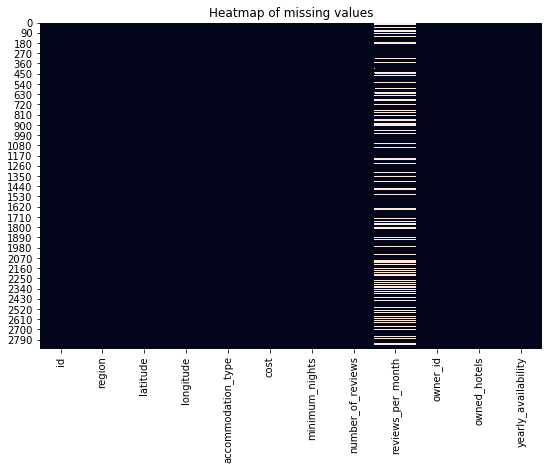

In [10]:
# Finding the scale of missing data.
plt.figure(figsize=(9,6))
sns.heatmap(data.isnull(), cbar=False)
plt.title("Heatmap of missing values")

In [11]:
data

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2865,47852,Manhattan,40.74316,-73.98038,Private room,400,2,0,NaN,270096906,1,1
2866,21978,Manhattan,40.73523,-73.99465,Private room,180,3,2,0.07,97266110,1,1
2867,23485,Manhattan,40.76619,-73.98987,Entire home/apt,179,3,17,0.67,10903067,1,0
2868,16757,Manhattan,40.74637,-73.97207,Private room,200,30,0,NaN,2856748,49,1


- In the above dataframe, there is an interesting observation that will logically justify the missing values. The number_of_reviews column has some hotels that have zero reviews, which is why the review_per_month corresponding to that value has a Null value. So in that case the review_per_month can be set as 0 wherever there is a 0 encountered in number_of_reviews.

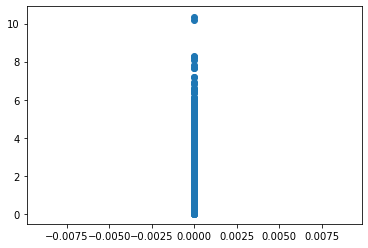

In [12]:
# Verifying our observation

import matplotlib.pyplot as plt
plt.scatter(data['number_of_reviews']==0, data['reviews_per_month'])
plt.show() 

- Filling the missing values with zero as explained above 

In [13]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

In [14]:
data.isna().sum()

id                     0
region                 0
latitude               0
longitude              0
accommodation_type     0
cost                   0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
owner_id               0
owned_hotels           0
yearly_availability    0
dtype: int64

In [15]:
df_check=data[['number_of_reviews','minimum_nights','cost','owned_hotels','reviews_per_month']].copy()

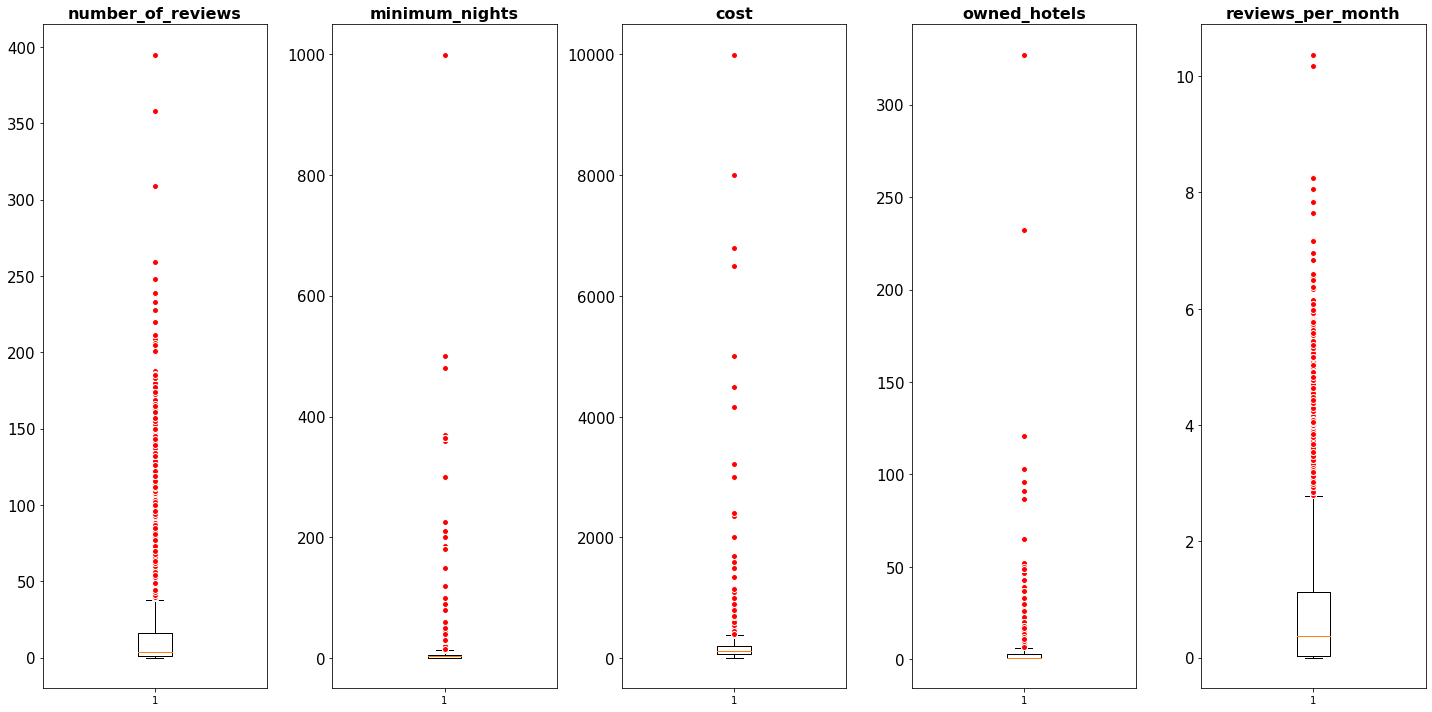

In [16]:
dot = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df_check.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_check.iloc[:,i], flierprops=dot)
    ax.set_title(df_check.columns[i], fontsize=16, fontweight='bold')
    ax.tick_params(axis='y', labelsize=15)
plt.tight_layout()

- In the above boxplot outlier visualization, I have removed the columns that are not applicable for outlier detection(for example- Latitude, Longitude, id, owner id and also the categorical values)

#### Observations:


- Some of these values have extreme values, such as cost which has the highest value of 10000 dollars, and may introduce some errors while training our model.
- Similarly there are other outliers in the dataset that we need to remove for our model to generalise well.
- Therefore the data is needed to be capped by using a statiscal method to find the outliers.

In [17]:
# Below we cap the upper and lower limit of outlying values.

df_org=data.copy()
df_org

col_names=['number_of_reviews','minimum_nights','cost','owned_hotels','reviews_per_month']
for i in col_names:
    upper_limit = data[i].mean() + 3*data[i].std()
    lower_limit = data[i].mean() - 3*data[i].std()

    data[i] = np.where(
        data[i]>upper_limit,
        upper_limit,
        np.where(
            data[i]<lower_limit,
            lower_limit,
            data[i]
        )
    )

- I have capped the outliers in the above cell, using z score. Now I will compare the original dataframe and the outlier capped new dataframe. To compare I will use a heatmap to find if the correlation between the columns have increased or not

In [18]:
# Next I will convert the string values into integer values by using label encoder.
labelencoder = LabelEncoder()
data['region'] = labelencoder.fit_transform(data['region'])
data['accommodation_type'] = labelencoder.fit_transform(data['accommodation_type'])
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,2,40.71854,-74.00439,0,170.0,5.0,7.000000,0.56,929983,1.0,0
1,246,1,40.64446,-73.95030,0,65.0,3.0,113.760497,2.30,281764,1.0,0
2,19091,3,40.78573,-73.81062,1,85.0,1.0,0.000000,0.00,19923341,1.0,1
3,34305,2,40.73863,-73.98002,1,210.0,30.0,0.000000,0.00,200380610,65.0,1
4,444,2,40.82426,-73.94630,2,75.0,3.0,38.000000,0.42,745069,3.0,1


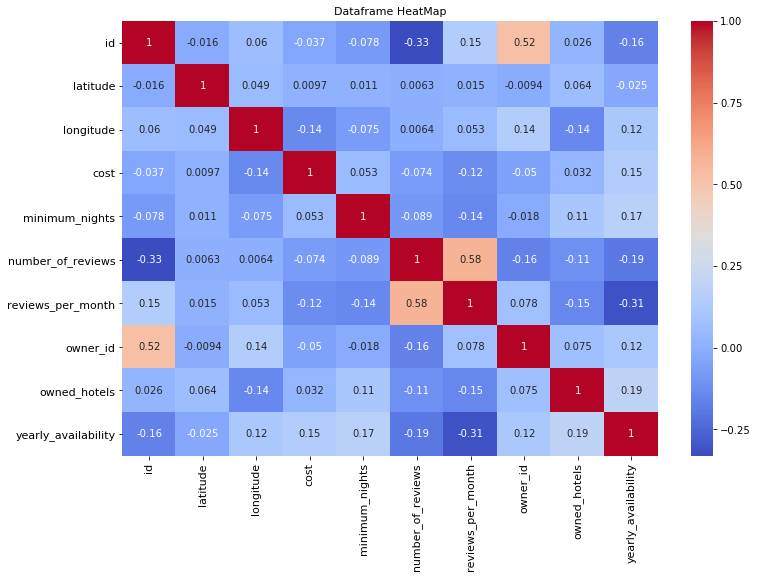

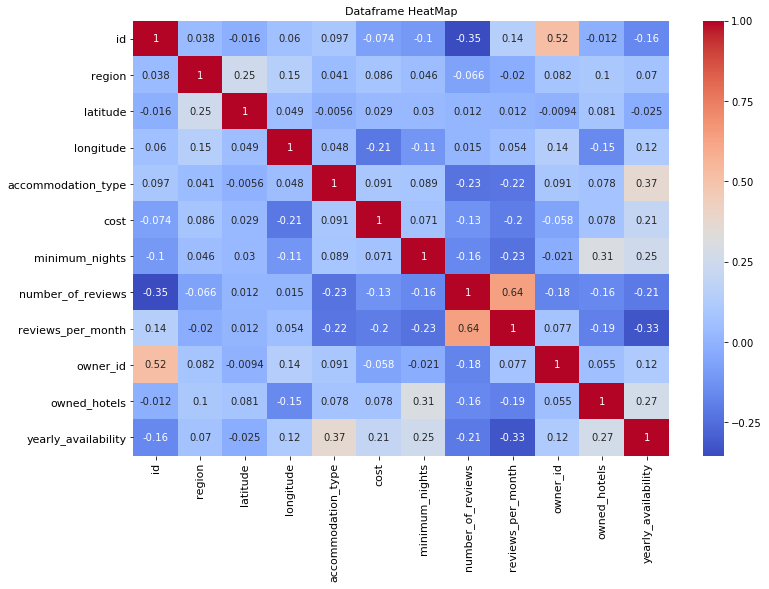

In [19]:
# Below we plot the correlation matrix of the original dataframe to see the feature dependecies
heatm=[df_org,data]
for i in heatm:
    cor=i.corr()
    plt.figure(figsize=(12,8))
    sns.heatmap(cor, annot=True, cmap="coolwarm")
    plt.xticks(fontsize= 11)
    plt.title("Dataframe HeatMap",fontsize= 11)
    plt.yticks(fontsize= 11)

- The first heatmap is from the original dataframe, the second heatmap is from the capped dataframe with changed distribution.
- As we can see in the second heatmap there are a lot of tiles where the values of the correlation between two entities have increased. Therefore increasing the feature dependencies and helping our model to train better.

## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

### Part 2: Visualization and Analysis:

Text(0.5, 1.0, 'Cost vs Availability')

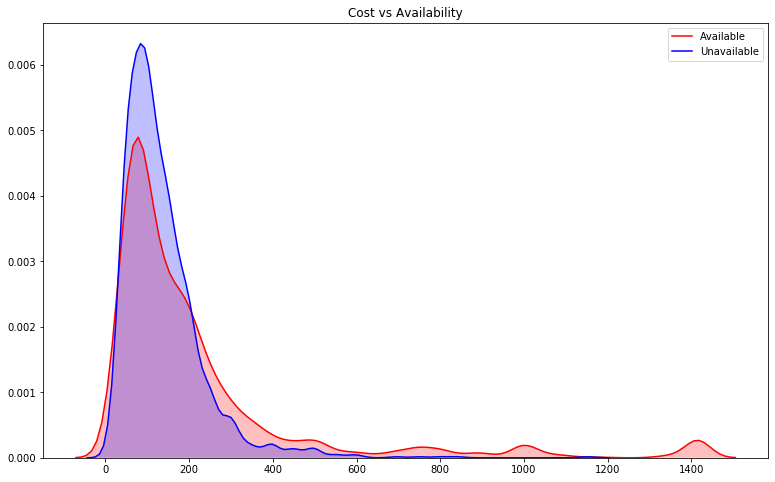

In [20]:
# Below is the plot to find the density overlap between cost of the booking and the yearly availability

plt.figure(figsize=(13,8))

sns.kdeplot( data.cost[data.yearly_availability==1], color="red", shade=True)

sns.kdeplot( data.cost[data.yearly_availability==0], color="blue", shade=True)

plt.legend(["Available","Unavailable"])
plt.title("Cost vs Availability")


- From the above plot it shows that many of the expensive booking manage to be available throughout the year more than the inexpensive hotels

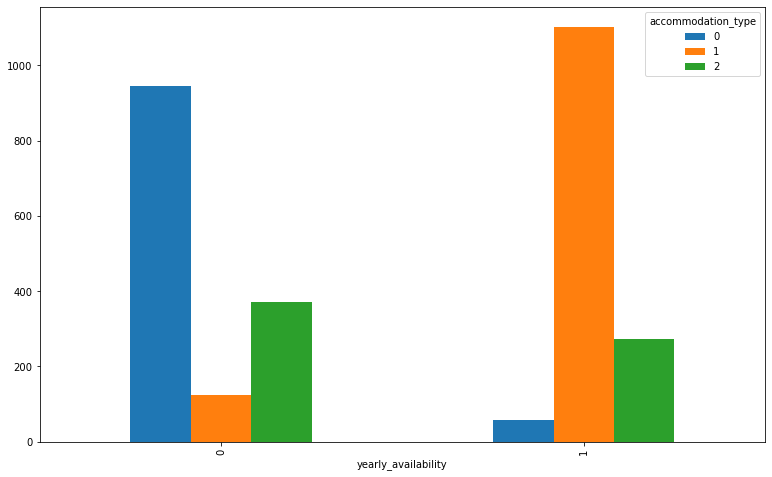

In [21]:
# Below we compare the accomodation types with their availability

group=data.groupby([data['yearly_availability'], data["accommodation_type"]]).size()
group_pd=group.unstack(level=1)
group_pd.plot(kind='bar', figsize=(13,8))

- From the above plot we can gather that the 0(Private room/apt) is the least available throughout the year, whereas the 1 (Private rooms) are the most reliable for the customer to be available throughout the year. 
- At last the shared bedroom have a similar distribution for being available and unavailble for 365 days. Hence if the company wants more reliable 365 days booking infrastructure, it would be advisable to invest in the Private rooms since it is performing poorly. 

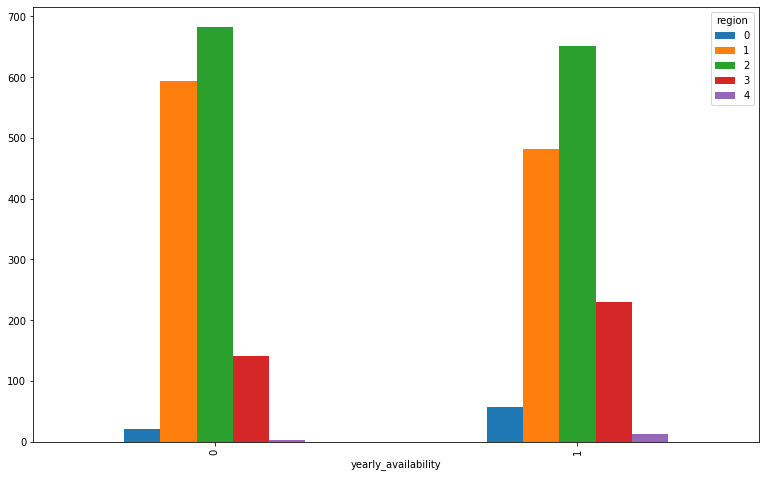

In [22]:
# Similarly, below we compare the regions with their availability
group=data.groupby([data['yearly_availability'], data["region"]]).size()
group_pd=group.unstack(level=1)
group_pd.plot(kind='bar', figsize=(13,8))

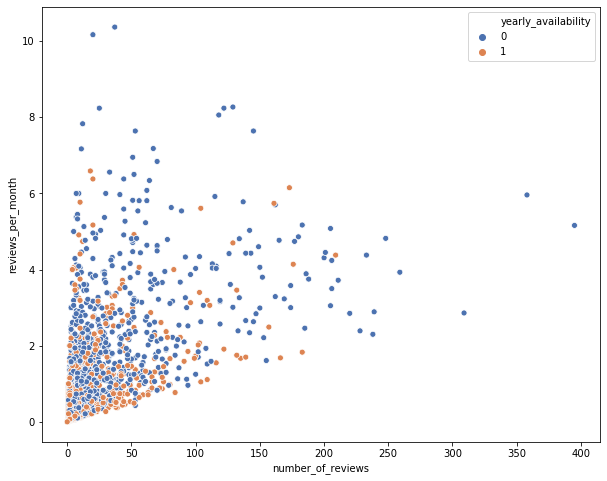

In [23]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_org, x='number_of_reviews', y='reviews_per_month',hue='yearly_availability',palette="deep")

- The above plot shows that the number of reviews are more for well performing hotels(yearly available). This could be due to the fact that the customers are happy and the hotel gets reviewed by the customer on an average basis. But if you see that many non yearly available hotels have less total number of reviews but reviews per month are high. 
- This could be due to the fact that the hotel could be newly opened (for the extremes). Or because the customers are going out of their way to leave reviews because of great incidents or bad incidents. 
- This could be a very insightful observation if the data for customer reviews is compared with this observation. Since it can tell us in what cases customers go out of their way to leave a review about the hotel. 

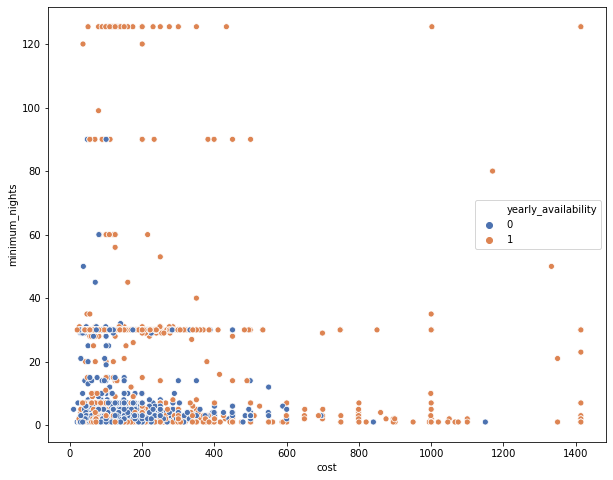

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='cost', y='minimum_nights',hue='yearly_availability',palette="deep")

- The above figure shows us that the cost of the hotel when the cost is high or minimum nights are more then they are more likely to be available. This could be due to the fact that they are able to sustain throughout the year. 
- There is an interesting observation here, it looks like the hotels need minimum of 30 nights stay in order to be more likely to be available throughout the night. As we can see that as we move above the 30 minimum nights cap, there are fewer hotels that might not be available. Interestingly many hotels have actually set the minimum limit at 30 nights. 
- Below the 30 minimum_nights value many hotels are not available, even a few expensive hotels ones are not available! What could this attribute from? This could be because they might be very popular among the customers, therefore the hotels with low cost and lesser minimum_nights are sold out quickly and unavailable throguhout the year.
- I am also assuming here that the hotel does not accept booking and is unavailable if it is fully booked, since it is not said otherwise.

yearly_availability
0    1439
1    1431
dtype: int64


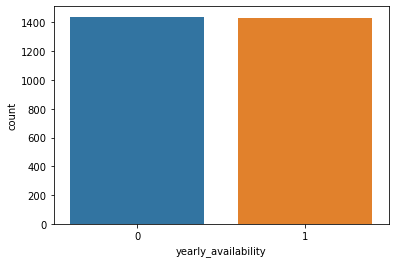

In [25]:
print(data.groupby('yearly_availability').size())

sns.countplot(x="yearly_availability", data=data)

- The above plot shows that there is little/no class imbalance, therefore we can train our model on the data given, as it is.

### Part 3: Feature Engineering

- Applying feature Engineering to increase our data and make it more robustly correlated

In [26]:
# Below I use a simple technique to map the latitudes and longitudes to 3 dimensions

data['x']= np.cos(data['latitude'])*np.cos(data['longitude'])
data['y']= np.cos(data['latitude'])*np.sin(data['longitude'])
data['z']= np.sin(data['latitude'])

In [27]:
# Below I created 2 new columns
# 1. months_of_reviews which has the month count since the start.
# 2. min_cost_of_stay which has the minimum cost of the stay that the customer has to pay on his stay.
# I specifically used these features for feature engineering because of their high correlation with the target


data['months_of_reviews']=data['reviews_per_month']/data['number_of_reviews']
data['min_cost_of_stay']=data['minimum_nights']*data['cost']
data['months_of_reviews']=data['months_of_reviews'].fillna(0)

In [28]:
x = data.drop(['id','yearly_availability','owner_id','latitude','longitude'],axis=1)
y=data['yearly_availability']

In [39]:
# Standard scaling the dataset
scaler = StandardScaler()
x_ss=scaler.fit_transform(x)
x_ss=pd.DataFrame(x_ss, columns=x.columns)

In [45]:
# Train test split in 90% train and 10% test to get more training data. We will also use cross validation for accuracy.

x_train, x_test, y_train, y_test = train_test_split(x_ss,y, test_size=0.1, random_state=42)

# 
### Part 4: Modelling

- Creating a model pipeline to test all the major classification models.

In [46]:
from pandas import set_option
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [47]:
def GetSimpleModel():
    simpleModels = []
    simpleModels.append(('Logistic Regression'   , LogisticRegression(max_iter=5000)))
    simpleModels.append(('KNeighbors'  , KNeighborsClassifier()))
    simpleModels.append(('DecisionTree' , DecisionTreeClassifier()))
    simpleModels.append(('Naive Bayes'   , GaussianNB()))
    simpleModels.append(('Support Vector Machine'  , SVC(probability=True)))
    simpleModels.append(('ADABoost'   , AdaBoostClassifier()))
    simpleModels.append(('GradientBoosting'  , GradientBoostingClassifier()))
    simpleModels.append(('RandomForest'   , RandomForestClassifier()))

    
    return simpleModels

In [48]:
def BasedLine(x_train, y_train,models):
    
    num_folds = 5
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds)
        res = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(res)
        names.append(name)
    cv_scores = []
    for cv in results:
        cv_scores.append("{:.4f}".format(cv.mean()))  

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': cv_scores})
    return scoreDataFrame

In [49]:
models = GetSimpleModel()
cv_Score=BasedLine(x_train, y_train,models)
cv_Score

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

,Model,Score
0,Logistic Regression,0.7360
1,KNeighbors,0.8804
2,DecisionTree,0.8846
3,Naive Bayes,0.6907
4,Support Vector Machine,0.8990
5,ADABoost,0.9121
6,GradientBoosting,0.9280
7,RandomForest,0.9206


# 
- Trying grid search cv for the random forest model since it has good performance

In [56]:
forest=RandomForestClassifier()
param_grid_rf = [{'n_estimators': [70,100,150], 'max_features': [5,7,9], 
 'max_depth': [3,10,12,15], 'bootstrap': [True, False]}]

In [57]:
clf_rf = GridSearchCV(forest, param_grid_rf,cv=5,verbose=0,n_jobs=-1)
best_model_rf = clf_rf.fit(x_ss,y)
msg = (best_model_rf.best_score_, best_model_rf.best_params_)
print("Best Score: %f, Best Params %s" % (msg))

Best Score: 0.934843, Best Params {'bootstrap': True, 'max_depth': 12, 'max_features': 7, 'n_estimators': 70}


# 
- Trying XGBoost Classifier model

In [53]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:37:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score of Ada Boost Classifier is : 0.9303135888501742
Confusion Matrix : 
[[123  11]
 [  9 144]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       134
           1       0.93      0.94      0.94       153

    accuracy                           0.93       287
   macro avg       0.93      0.93      0.93       287
weighted avg       0.93      0.93      0.93       287



# 
- Trying CatBoostClassifier below and checking the test accuracy

In [54]:
cat = CatBoostClassifier(iterations=100)
cat.fit(x_train, y_train)

y_pred_cat = cat.predict(x_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

Learning rate set to 0.127618
0:	learn: 0.6118188	total: 49.1ms	remaining: 4.86s
1:	learn: 0.5504536	total: 51.1ms	remaining: 2.51s
2:	learn: 0.4977035	total: 52.9ms	remaining: 1.71s
3:	learn: 0.4568064	total: 54.6ms	remaining: 1.31s
4:	learn: 0.4200945	total: 56.7ms	remaining: 1.08s
5:	learn: 0.3894858	total: 59.4ms	remaining: 930ms
6:	learn: 0.3632787	total: 61.2ms	remaining: 813ms
7:	learn: 0.3420459	total: 63.1ms	remaining: 726ms
8:	learn: 0.3232073	total: 65.2ms	remaining: 659ms
9:	learn: 0.3082384	total: 67.4ms	remaining: 607ms
10:	learn: 0.2944011	total: 69.2ms	remaining: 560ms
11:	learn: 0.2832073	total: 71.2ms	remaining: 522ms
12:	learn: 0.2726689	total: 73.2ms	remaining: 490ms
13:	learn: 0.2642662	total: 75.2ms	remaining: 462ms
14:	learn: 0.2575567	total: 77.1ms	remaining: 437ms
15:	learn: 0.2506694	total: 79.1ms	remaining: 415ms
16:	learn: 0.2436587	total: 81.1ms	remaining: 396ms
17:	learn: 0.2386354	total: 83.7ms	remaining: 381ms
18:	learn: 0.2340219	total: 86.1ms	remaining

In [55]:
print(f"Accuracy Score of Cat Boost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Cat Boost Classifier is : 0.926829268292683
Confusion Matrix : 
[[122  12]
 [  9 144]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       134
           1       0.92      0.94      0.93       153

    accuracy                           0.93       287
   macro avg       0.93      0.93      0.93       287
weighted avg       0.93      0.93      0.93       287



- The best performing performing model out of Random Forest Classifier, XGBoost and CatBoost. After trial and error, I felt Random forest performed the best and therefore I will use that model for final predictions 

# 
### Part 5: Prediction and Inference

- Importing and preprocessing the test data

In [60]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


In [61]:
def pre_process(df):
    df['reviews_per_month']=df['reviews_per_month'].fillna(0)
    
    col_names=['number_of_reviews','minimum_nights','cost','owned_hotels','reviews_per_month']
    for i in col_names:
        upper_limit = df[i].mean() + 3*df[i].std()
        lower_limit = df[i].mean() - 3*df[i].std()

        df[i] = np.where(
            df[i]>upper_limit,
            upper_limit,
            np.where(
                df[i]<lower_limit,
                lower_limit,
                df[i]
            )
        )
    
    le = LabelEncoder()
    df.region=le.fit_transform(df.region)
    df.accommodation_type=le.fit_transform(df.accommodation_type)
    
    df['x']= np.cos(df['latitude'])*np.cos(df['longitude'])
    df['y']= np.cos(df['latitude'])*np.sin(df['longitude'])
    df['z']= np.sin(df['latitude'])
    
    df['months_of_reviews']=df['reviews_per_month']/df['number_of_reviews']
    df['min_cost_of_stay']=df['minimum_nights']*df['cost']
    df['months_of_reviews']=df['months_of_reviews'].fillna(0)
    
    x = df.drop(columns=['id','owner_id','latitude','longitude'])
    
    #Scaling
    scaler = StandardScaler()
    df_ss=scaler.fit_transform(x)
    df_ss=pd.DataFrame(df_ss, columns=x.columns)
    
    return df_ss  

In [62]:
x_test1=pre_process(test_data)

In [63]:
x_test1.shape

(718, 12)

In [64]:
x_test1

,region,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,x,y,z,months_of_reviews,min_cost_of_stay
0,-0.892332,1.413036,-0.158801,-0.354584,0.388042,-0.180147,-0.355571,0.165959,-0.126067,0.362864,-0.416729,-0.227051
1,-0.892332,-1.185069,-0.516755,-0.354584,-0.262875,0.018425,-0.299282,-0.207155,2.969473,2.712596,-0.044128,-0.245172
2,0.467953,0.113984,0.329318,0.992836,-0.634827,-0.726220,0.263607,-0.639928,-0.212293,-0.662714,-0.552221,0.662557
3,0.467953,1.413036,-0.213037,0.992836,-0.216381,-0.047765,-0.355571,0.133459,-0.827736,-0.852441,-0.140728,0.250702
4,0.467953,-1.185069,-0.657768,-0.402706,-0.030404,-0.130504,-0.299282,0.159373,-0.988596,-1.323841,-0.302083,-0.258214
...,...,...,...,...,...,...,...,...,...,...,...,...
713,-2.252617,-1.185069,-0.473367,-0.354584,1.038958,0.771344,-0.355571,0.777613,-1.386212,-2.103033,-0.325147,-0.242976
714,-0.892332,-1.185069,-0.104566,-0.306462,1.364417,0.399022,-0.355571,0.116565,-0.112639,0.342431,-0.409377,-0.204399
715,0.467953,-1.185069,-0.402861,-0.354584,2.154815,2.872899,-0.355571,-0.810766,0.503420,0.277169,-0.224783,-0.239406
716,0.467953,0.113984,0.193730,0.992836,-0.634827,-0.726220,0.882785,-0.416408,-0.173975,-0.263394,-0.552221,0.559593


#### Below we make predictions on the test data

In [65]:
preds= best_model_rf.predict(x_test1)

In [66]:
preds

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,

In [67]:
di=pd.DataFrame({"id":test_data.id,"yearly_availability":preds.astype(int) })

In [68]:
di

,id,yearly_availability
0,19215,0
1,36301,0
2,40566,1
3,33694,0
4,28873,0
...,...,...
713,26801,0
714,20110,0
715,31383,0
716,47135,1




**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [69]:
x_ss

,region,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,x,y,z,months_of_reviews,min_cost_of_stay
0,0.392270,-1.171745,-0.037937,-0.246494,-0.316505,-0.254657,-0.350180,-1.090738,0.811436,0.233917,-0.169263,-0.154212
1,-0.959247,-1.171745,-0.556399,-0.356374,3.974646,1.245139,-0.350180,0.023956,1.246151,1.574609,-0.442197,-0.246320
2,1.743787,0.167525,-0.457644,-0.466253,-0.597864,-0.737350,-0.350180,2.824985,-1.735801,-0.992878,-0.534502,-0.261789
3,0.392270,0.167525,0.159572,1.126996,-0.597864,-0.737350,3.365272,-0.609864,0.071339,-0.132092,-0.534502,0.612190
4,0.392270,1.506796,-0.507022,-0.356374,0.929515,-0.375331,-0.234072,0.057373,-1.073389,-1.698789,-0.484041,-0.242102
...,...,...,...,...,...,...,...,...,...,...,...,...
2865,0.392270,0.167525,1.097742,-0.411313,-0.597864,-0.737350,-0.350180,-0.618508,0.024510,-0.214731,-0.534502,-0.161243
2866,0.392270,0.167525,0.011440,-0.356374,-0.517476,-0.677014,-0.350180,-0.902443,0.389972,-0.070092,-0.374710,-0.197805
2867,0.392270,-1.171745,0.006503,-0.356374,0.085437,-0.159843,-0.350180,-0.815770,-0.031628,-0.635390,-0.354568,-0.198227
2868,0.392270,0.167525,0.110195,1.126996,-0.597864,-0.737350,2.436409,-0.452179,-0.158491,-0.273312,-0.534502,0.570002


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature: 0, Score: 0.00587
Feature: 1, Score: 0.54738
Feature: 2, Score: 0.02738
Feature: 3, Score: 0.01158
Feature: 4, Score: 0.01932
Feature: 5, Score: 0.04048
Feature: 6, Score: 0.19664
Feature: 7, Score: 0.03584
Feature: 8, Score: 0.02673
Feature: 9, Score: 0.02654
Feature: 10, Score: 0.02622
Feature: 11, Score: 0.03602


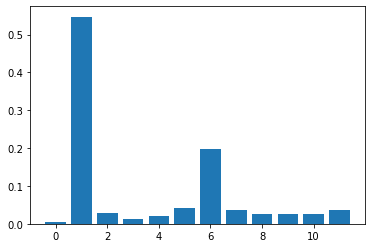

In [70]:
# Using the Random Forest Regressor to calculate the Feature Importances

from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
model = RandomForestRegressor()
model.fit(x_ss, y)
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

##### According to the above figure, the 1st feature(accomodation_type) has the most importance. To check the other labels, refer the cell above feature importance

### Part 6: Observations

- For the hotel booking agency, they should focus more on Reviews_per_month and the Accommodation_type received in order to fund the hotels that could support bookings for 365 days. The company can further decide the funding based on the owner. For example, features like owned_hotels also play an important role in identifying worthy hotels for funding. 
- During visualization we found a strong and obvious correlation between the region, accomodation type and the yearly_availability. Therefore, in my opinion the region where the availabilty is the lowest can be focussed on for funding.
- Furthermore, since we already know that the private rooms offer the most number of availabilty for 365 days, we can boil down our choices for investment. Which means that the private rooms are unavailable and therefore they might need assisstance and funding.
- We also saw that the private rooms are the most popular ones. Their reviews are generally higher and they are usually unavailable to the customer. This could mean that the private rooms must be sold out or they are unable to sustain themselves. Either way, providing them the funding would be a good decision.
- The inexpensive hotels are unable to accomodate guests and might require assistance.
- The hotels that have 30 or less than 30 minimum nights are generally unavailable to the user. This observation was made on the scatter plot. Therefore the investment can be directed using a certain criteria depending on the minimum nights of stay and their cost correlation.
- The Region of the hotel also plays a major role in identifying the pattern of availability. Some regions have a very high inavailabilty as compared to others. Therefore investment must be made there as they might be sold out and business can be increased there.
- Many apartment type homes have a minimum nights threshsold that is very high, the reason why they are commonly not available because even by a few bookings, they are occupied throughout the year.

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [73]:
#Submission
di.to_csv('submissions.csv',index=False)

---